In [359]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

"""Import basic modules."""
import numpy as np               # For linear algebra
import pandas as pd              # For data manipulation
import matplotlib.pyplot as plt  # For 2D visualization
import seaborn as sns            
from scipy import stats          # For statistics

"""Plotly visualization."""
import plotly.graph_objs as go
from plotly.tools import make_subplots
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

"""Machine learning models."""
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression


"""Classification (evaluation) metrices."""
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-youtube-channels-data/most_subscribed_youtube_channels.csv


In [360]:
yt_data = pd.read_csv('/kaggle/input/top-youtube-channels-data/most_subscribed_youtube_channels.csv')
yt_data.head()

,rank,Youtuber,subscribers,video views,video count,category,started
0,1,T-Series,"222,000,000","198,459,090,822","17,317",Music,2006
1,2,YouTube Movies,"154,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"140,000,000","135,481,339,848",786,Education,2006
3,4,SET India,"139,000,000","125,764,252,686","91,271",Shows,2006
4,5,Music,"116,000,000",0,0,NaN,2013


In [361]:
yt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1000 non-null   int64 
 1   Youtuber     1000 non-null   object
 2   subscribers  1000 non-null   object
 3   video views  1000 non-null   object
 4   video count  1000 non-null   object
 5   category     973 non-null    object
 6   started      1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


## **Cleaning Data**

In [362]:
## Setting rank as index
yt_data.set_index('rank', inplace = True)

In [363]:
## Changing the data types
yt_data['started'] = yt_data['started'].astype('int')

In [364]:
yt_data['subscribers'] = yt_data['subscribers'].str.replace(',','').astype('int')

In [365]:
yt_data['video views'] = yt_data['video views'].str.replace(',','').astype('int')
yt_data['video count'] = yt_data['video count'].str.replace(',','').astype('int')

In [366]:
yt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Youtuber     1000 non-null   object
 1   subscribers  1000 non-null   int64 
 2   video views  1000 non-null   int64 
 3   video count  1000 non-null   int64 
 4   category     973 non-null    object
 5   started      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 54.7+ KB


In [367]:
## making a copy
data = yt_data.copy()

In [368]:
## checking for duplicate values
data[data.duplicated()]

,Youtuber,subscribers,video views,video count,category,started
rank,,,,,,


In [369]:
## Replacing null values
data.isna().sum()

Youtuber        0
subscribers     0
video views     0
video count     0
category       27
started         0
dtype: int64

In [370]:
yt_mode = data['category'].mode()[0]
yt_mode

'Entertainment'

In [371]:
data['category'].value_counts()

Entertainment            241
Music                    222
People & Blogs           119
Gaming                   102
Comedy                    63
Film & Animation          52
Education                 46
Howto & Style             45
News & Politics           27
Science & Technology      18
Shows                     14
Sports                    10
Pets & Animals             6
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Autos & Vehicles           1
Travel & Events            1
Name: category, dtype: int64

In [372]:
data['category'].fillna(yt_mode, inplace=True)

In [373]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Youtuber     1000 non-null   object
 1   subscribers  1000 non-null   int64 
 2   video views  1000 non-null   int64 
 3   video count  1000 non-null   int64 
 4   category     1000 non-null   object
 5   started      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 54.7+ KB


## **Correlation Analysis**

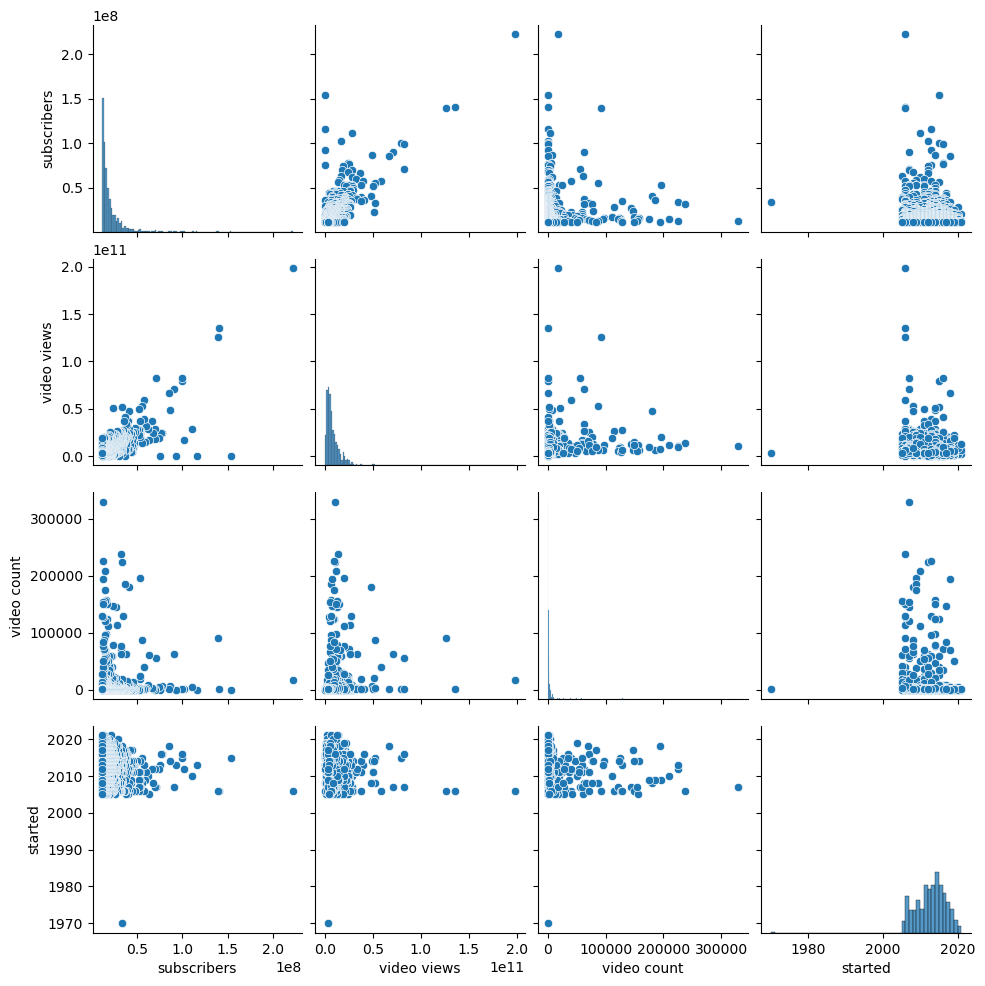

In [374]:
sns.pairplot(data)

In [375]:
## checking the correlation co-effiecient of the data
data.corr()

,subscribers,video views,video count,started
subscribers,1.000000,0.746863,0.061532,-0.128347
video views,0.746863,1.000000,0.148523,-0.164909
video count,0.061532,0.148523,1.000000,-0.134984
started,-0.128347,-0.164909,-0.134984,1.000000


## **Hypothesis testing**


### 1. **There is significant difference in average subscribers count between different categories of youtube channels**

+ Null Hypothesis: There is no significant difference in average subscribers count between different categories of youtube channels
+ Alternate Hypothesis: There is significant difference in average subscribers count between different categories of youtube channels

In [376]:
cat_sub_mean = data.groupby('category')['subscribers'].mean().reset_index()
cat_sub_mean

,category,subscribers
0,Autos & Vehicles,1.670000e+07
1,Comedy,1.783968e+07
2,Education,2.339565e+07
3,Entertainment,1.953657e+07
4,Film & Animation,2.352692e+07
5,Gaming,1.864510e+07
6,Howto & Style,1.741556e+07
7,Movies,2.215000e+07
8,Music,2.303739e+07
9,News & Politics,1.810741e+07


In [377]:
result = stats.f_oneway(*[group['subscribers'] for name, group in data.groupby('category')])

f_statistic = result.statistic
p_value = result.pvalue

print("F-Statistic:", f_statistic)
print("p-value:", p_value)

F-Statistic: 1.999972176598063
p-value: 0.009235879933027328


In [378]:
alpha = 0.05
if p_value <= alpha:
    print('We reject Null Hypothesis  & there is a significance difference in average subscribers count between different categories of youtube channels')
else:
    print('We fail to reject Null hypothesis')

We reject Null Hypothesis  & there is a significance difference in average subscribers count between different categories of youtube channels


### 2. **There is significant difference in average video views between different categories of youtube channels**

+ Null Hypothesis: There is no significant difference in average video views between different categories of youtube channels
+ Alternate Hypothesis: There is significant difference in average video views count between different categories of youtube channels

In [379]:
cat_vv_mean = data.groupby('category')['video views'].mean().reset_index()
cat_vv_mean

,category,video views
0,Autos & Vehicles,6.530946e+09
1,Comedy,5.230995e+09
2,Education,1.299158e+10
3,Entertainment,8.235800e+09
4,Film & Animation,9.461677e+09
5,Gaming,6.535390e+09
6,Howto & Style,4.162875e+09
7,Movies,6.419546e+09
8,Music,1.309104e+10
9,News & Politics,8.924094e+09


In [380]:
result = stats.f_oneway(*[group['video views'] for name, group in data.groupby('category')])

f_statistic = result.statistic
p_value = result.pvalue

print("F-Statistic:", f_statistic)
print("p-value:", p_value)

F-Statistic: 5.654497438485551
p-value: 2.227451501948171e-12


In [381]:
alpha = 0.05
if p_value <= alpha:
    print('We reject Null Hypothesis  & there is a significance difference in average video views between different categories of youtube channels')
else:
    print('We fail to reject Null hypothesis')

We reject Null Hypothesis  & there is a significance difference in average video views between different categories of youtube channels


### 3. **There is significant difference in average video count between different categories of youtube channels**

+ Null Hypothesis: There is no significant difference in average video count between different categories of youtube channels
+ Alternate Hypothesis: There is significant difference in average video count count between different categories of youtube channels



In [382]:
cat_vc_mean = data.groupby('category')['video count'].mean().reset_index()
cat_vc_mean

,category,video count
0,Autos & Vehicles,2874.000000
1,Comedy,1485.111111
2,Education,2711.456522
3,Entertainment,10020.171642
4,Film & Animation,2563.826923
5,Gaming,4189.137255
6,Howto & Style,1809.311111
7,Movies,2788.000000
8,Music,2298.815315
9,News & Politics,102025.666667


In [383]:
result = stats.f_oneway(*[group['video count'] for name, group in data.groupby('category')])

f_statistic = result.statistic
p_value = result.pvalue

print("F-Statistic:", f_statistic)
print("p-value:", p_value)

F-Statistic: 26.910956164899297
p-value: 6.186810919560991e-70


In [384]:
alpha = 0.05
if p_value <= alpha:
    print('We reject Null Hypothesis  & there is a significance difference in average video count between different categories of youtube channels')
else:
    print('We fail to reject Null hypothesis')

We reject Null Hypothesis  & there is a significance difference in average video count between different categories of youtube channels


## 4. **The average video views of channels started before 2012 are significantly different from those started after 2012**

2012 because from the graph below it can be obsereved that graph does not fluctuate as much
+ Null Hypothesis: The average video views of channels started before 2012 are not significantly different from those started after 2012
+ Alternate Hypothesis: The average video views of channels started before 2012 are significantly different from those started after 2012



In [385]:
before_2012 = data[data['started'] < 2012]
before_2012.sort_values('started')

,Youtuber,subscribers,video views,video count,category,started
rank,,,,,,
100,YouTube,33300000,2725286912,540,News & Politics,1970
618,CNN,14100000,12083277333,155569,News & Politics,2005
72,Ishtar Music,37800000,14999240876,4535,Trailers,2005
65,Rihanna,39600000,20092128845,79,Entertainment,2005
318,shane,19600000,4269173489,566,People & Blogs,2005
...,...,...,...,...,...,...
620,ช่อง8 : Thai Ch8,14100000,5221155648,20582,Entertainment,2011
218,Collins Key,23900000,6368398946,251,Entertainment,2011
630,F2Freestylers - Ultimate Soccer Skills Channel,14000000,3152582636,777,Sports,2011


In [386]:
after_2012 = data[data['started'] >= 2012]
after_2012.sort_values('started')

,Youtuber,subscribers,video views,video count,category,started
rank,,,,,,
168,MR. INDIAN HACKER,26800000,4592841527,812,Science & Technology,2012
516,T3ddy,15200000,2528566554,1700,Comedy,2012
147,Worldwide Records Bhojpuri,28600000,14501468946,5927,Music,2012
517,Musas,15200000,2359375167,611,Howto & Style,2012
862,Timba Vk,11800000,2538254830,890,Gaming,2012
...,...,...,...,...,...,...
594,LIV Crime,14400000,7061275751,4281,People & Blogs,2020
727,SMOL,12800000,13067020729,1960,People & Blogs,2021
282,MrBeast en Español,20700000,2290112686,72,Entertainment,2021


In [387]:
before_2012 = before_2012[['video views', 'started']]
before_2012.head()

,video views,started
rank,,
1,198459090822,2006
3,135481339848,2006
4,125764252686,2006
6,28469458228,2010
11,70544743313,2007


In [388]:
after_2012 = after_2012[['video views', 'started']]
after_2012.head()

,video views,started
rank,,
2,0,2015
5,0,2013
7,16832456681,2012
8,79602288245,2015
9,81963845811,2016


In [389]:
result = ttest_ind(before_2012["video views"], after_2012["video views"], alternative='two-sided')

t_statistic = result.statistic
p_value = result.pvalue

print("t-Statistic:", t_statistic)
print("p-value:", p_value)

t-Statistic: 4.8910488914936865
p-value: 1.168544351724751e-06


In [390]:
alpha = 0.05
if p_value <= alpha:
    print('We reject Null Hypothesis  & there is a significance difference in average video count between different categories of youtube channels')
else:
    print('We fail to reject Null hypothesis')

We reject Null Hypothesis  & there is a significance difference in average video count between different categories of youtube channels


## 5. **The distribution of subscribers among different content categories follows a normal distribution.**

+ Null hypothesis: The observed distribution of subscribers among categories follows a normal distribution.
+ Alternative hypothesis: The observed distribution of subscribers among categories does not follow a normal distribution.

In [391]:
observed = data.groupby('category')['subscribers'].sum().tolist()
total_subscribers = sum(observed)
expected = [total_subscribers / len(observed)] * len(observed)
dfoe = pd.DataFrame([observed, expected])
dfoe.rename({0:'observed',1: 'expected'})

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
observed,1.670000e+07,1.123900e+09,1.076200e+09,5.235800e+09,1.223400e+09,1.901800e+09,7.837000e+08,4.430000e+07,5.114300e+09,4.889000e+08,4.770000e+07,2.258100e+09,8.040000e+07,3.001000e+08,4.814000e+08,2.594000e+08,7.120000e+07,1.210000e+07
expected,1.139967e+09,1.139967e+09,1.139967e+09,1.139967e+09,1.139967e+09,1.139967e+09,1.139967e+09,1.139967e+09,1.139967e+09,1.139967e+09,1.139967e+09,1.139967e+09,1.139967e+09,1.139967e+09,1.139967e+09,1.139967e+09,1.139967e+09,1.139967e+09


In [392]:
chi2_stat, p_value = stats.chisquare(observed, expected)
print(chi2_stat)
print(p_value)

38659602397.73093
0.0


In [393]:
alpha = 0.05
if p_value < alpha:
    print("We reject null hypothese and there is a significant difference between the observed and expected distributions.")
else:
    print("There is no significant difference between the observed and expected distributions.")

We reject null hypothese and there is a significant difference between the observed and expected distributions.


## **Analysis based on the 'started' year**

In [394]:
## Sorting the data
data.sort_values('started', inplace = True)
data.head()

,Youtuber,subscribers,video views,video count,category,started
rank,,,,,,
100,YouTube,33300000,2725286912,540,News & Politics,1970
23,Zee TV,63000000,17111576122,60802,Entertainment,2005
545,BIGBANG,14800000,7353265213,776,Music,2005
65,Rihanna,39600000,20092128845,79,Entertainment,2005
537,LEGO,14900000,18840617532,28683,Entertainment,2005


In [395]:
data.tail()

,Youtuber,subscribers,video views,video count,category,started
rank,,,,,,
349,TRT Originals Urdu,18600000,7370103100,740,Entertainment,2020
727,SMOL,12800000,13067020729,1960,People & Blogs,2021
282,MrBeast en Español,20700000,2290112686,72,Entertainment,2021
942,Marta and Rustam,11200000,12481668186,390,Comedy,2021
841,Azhan5star,11900000,6371101819,365,Entertainment,2021


In [396]:
## since 1970 is an outlier, the data point will not be considered for the analysis
data = data.loc[data.started != 1970]
data.head()

,Youtuber,subscribers,video views,video count,category,started
rank,,,,,,
23,Zee TV,63000000,17111576122,60802,Entertainment,2005
545,BIGBANG,14800000,7353265213,776,Music,2005
65,Rihanna,39600000,20092128845,79,Entertainment,2005
537,LEGO,14900000,18840617532,28683,Entertainment,2005
318,shane,19600000,4269173489,566,People & Blogs,2005


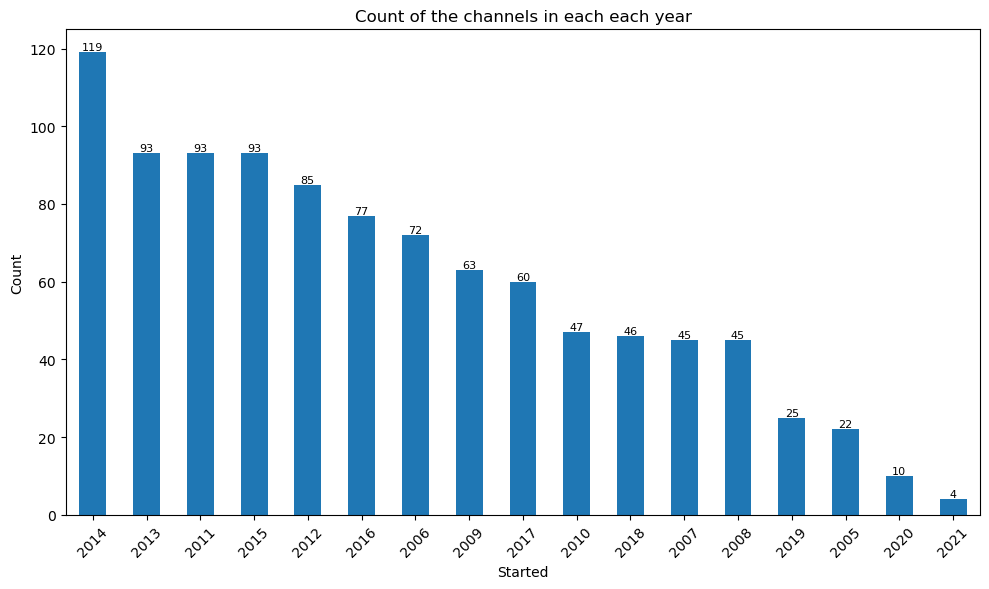

In [397]:
## count of the channels created in year each from the started column
year_counts = data.groupby('started').size().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = year_counts.plot(kind='bar')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=8)

plt.xlabel('Started')
plt.ylabel('Count')
plt.title('Count of the channels in each each year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [398]:
year_mean = data.groupby('started')['subscribers', 'video count', 'video views'].mean().reset_index()
year_mean

,started,subscribers,video count,video views
0,2005,2.197273e+07,15480.409091,1.044777e+10
1,2006,2.767361e+07,16612.625000,1.676924e+10
2,2007,2.365111e+07,24476.800000,1.396931e+10
3,2008,2.118222e+07,14807.333333,1.140225e+10
4,2009,2.001111e+07,10564.380952,1.023113e+10
5,2010,1.935957e+07,9957.319149,8.997569e+09
6,2011,1.981720e+07,5772.118280,8.804918e+09
7,2012,2.116588e+07,7142.811765,8.844339e+09
8,2013,2.200108e+07,7368.139785,7.183893e+09
9,2014,1.904790e+07,8370.806723,8.453754e+09


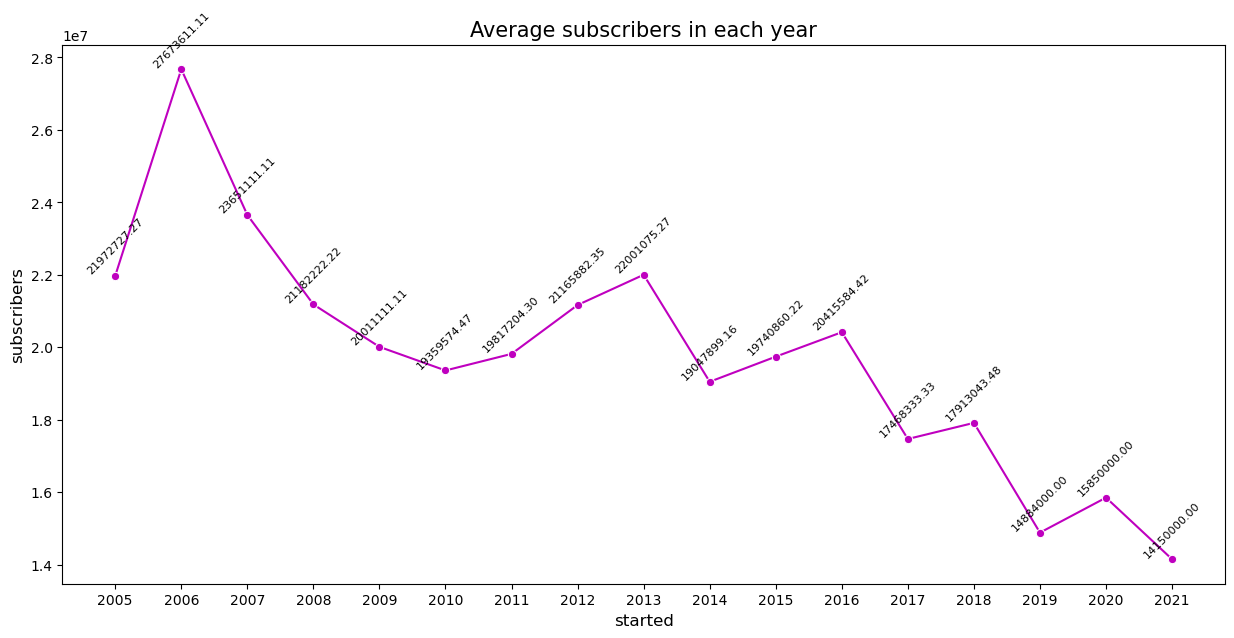

In [399]:
plt.figure(figsize=(15,7))
sns.lineplot(data=year_mean,x='started',y='subscribers', marker='o', color = 'm')
plt.xticks(year_mean['started'])
plt.xlabel("started", size=12)
plt.ylabel("subscribers", size=12)
plt.title("Average subscribers in each year", size=15)
for x, y in zip(year_mean['started'], year_mean['subscribers']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', size = 8, rotation = 45)
plt.show()

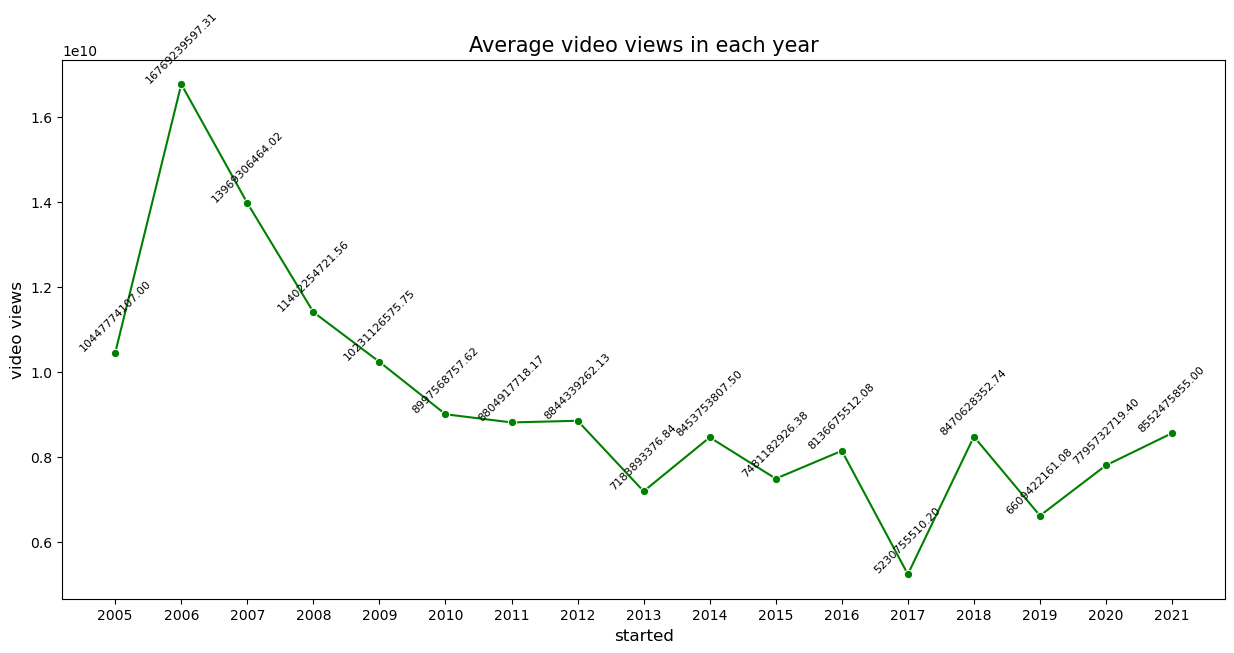

In [400]:
plt.figure(figsize=(15,7))
sns.lineplot(data=year_mean,x='started',y='video views', marker='o', color='g')
plt.xticks(year_mean['started'])
plt.xlabel("started", size=12)
plt.ylabel("video views", size=12)
plt.title("Average video views in each year", size=15)
for x, y in zip(year_mean['started'], year_mean['video views']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', size = 8, rotation = 45)
plt.show()

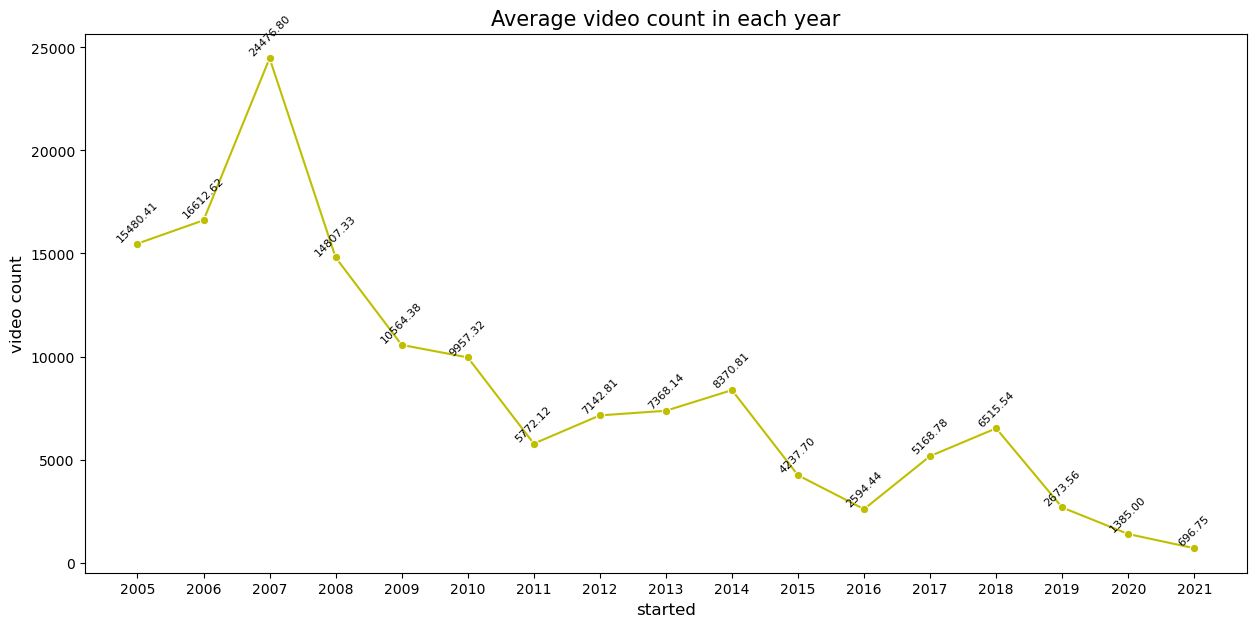

In [401]:
plt.figure(figsize=(15,7))
sns.lineplot(data=year_mean,x='started',y='video count', marker='o', color = 'y')
plt.xticks(year_mean['started'])
plt.xlabel("started", size=12)
plt.ylabel("video count", size=12)
plt.title("Average video count in each year", size=15)
for x, y in zip(year_mean['started'], year_mean['video count']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', size = 8, rotation = 45)
plt.show()

In [402]:
year_cat = data.groupby('started')['category'].value_counts().reset_index(name='count')
year_cat

,started,category,count
0,2005,Music,7
1,2005,Entertainment,6
2,2005,People & Blogs,2
3,2005,Comedy,1
4,2005,Gaming,1
...,...,...,...
162,2020,Gaming,1
163,2020,Pets & Animals,1
164,2021,Entertainment,2
165,2021,Comedy,1


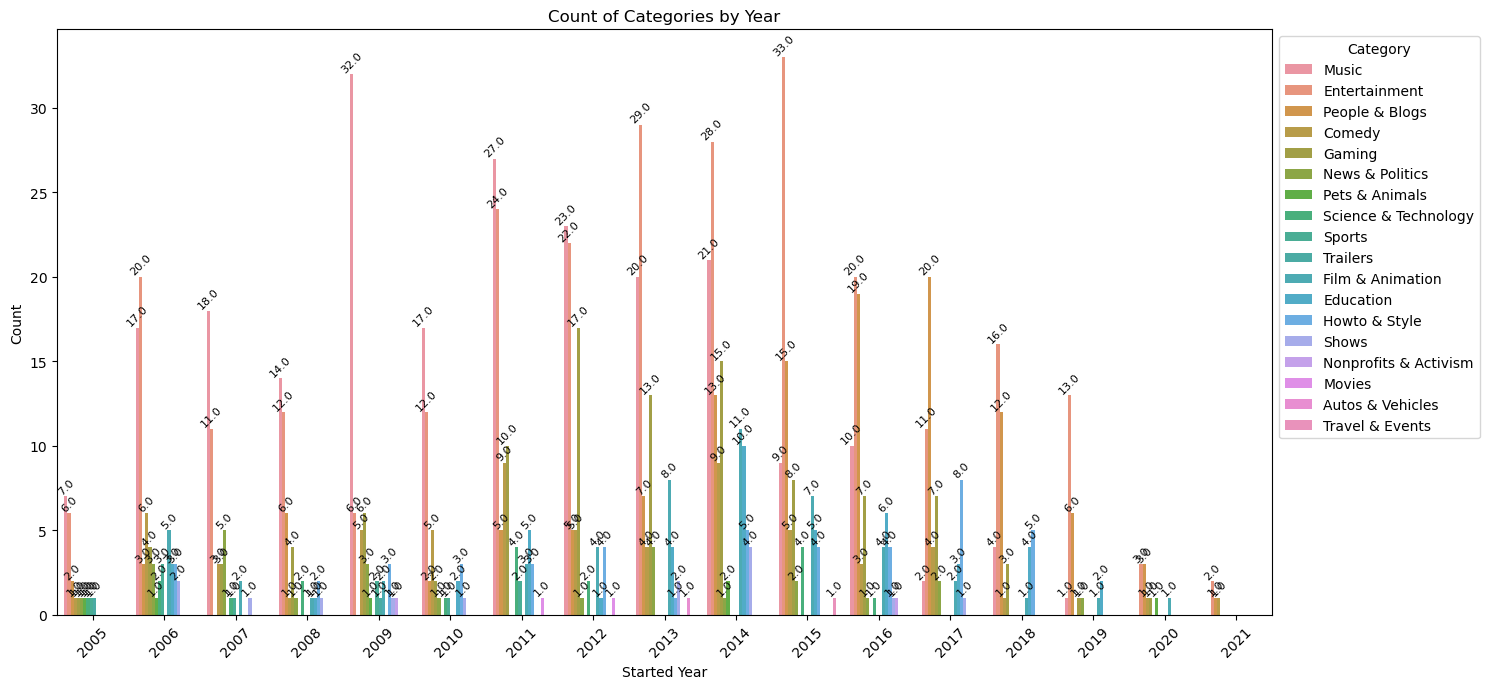

In [403]:
plt.figure(figsize=(15, 7))
ax = sns.barplot(data=year_cat, x='started', y='count', hue='category')
plt.xlabel('Started Year')
plt.ylabel('Count')
plt.title('Count of Categories by Year')
plt.xticks(rotation=45)
plt.legend(title='Category' , bbox_to_anchor=(1, 1))
plt.tight_layout()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=8, rotation = 45)
plt.show()

## **Analysis based on the Category**

In [404]:
## Sorting the values
data.sort_values('category', inplace = True)
data.head()

,Youtuber,subscribers,video views,video count,category,started
rank,,,,,,
433,DUDU e CAROL,16700000,6530946230,2874,Autos & Vehicles,2013
320,Noor Stars,19500000,2545886796,627,Comedy,2014
515,Bizarrap,15200000,4683488651,78,Comedy,2017
87,Jkk Entertainment,35700000,15133442317,194,Comedy,2017
882,Rubius Z,11700000,1828200652,429,Comedy,2006


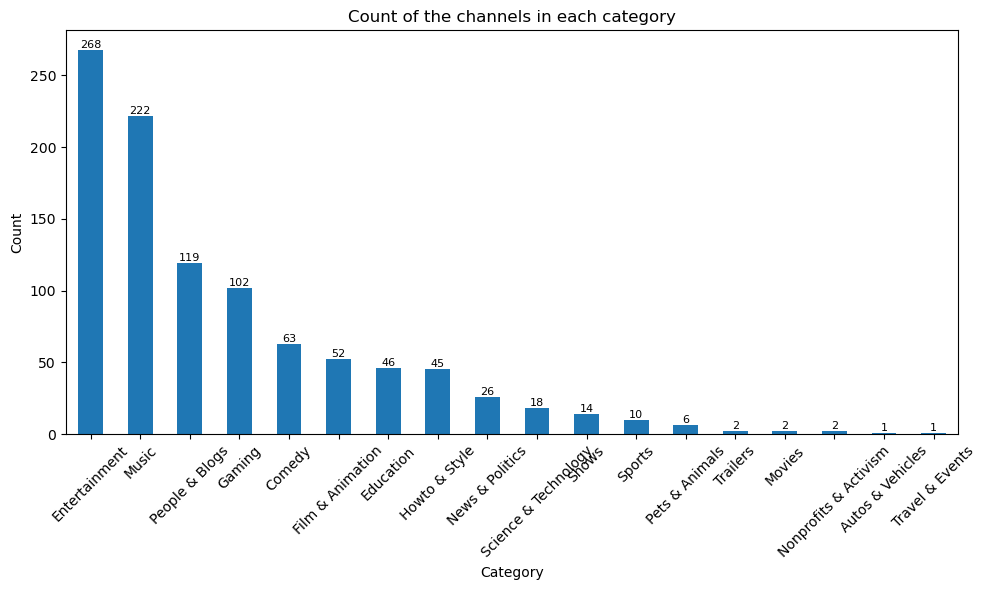

In [405]:
category_counts = data.groupby('category').size().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = category_counts.plot(kind='bar')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=8)

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of the channels in each category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [406]:
cat_mean = data.groupby('category')['subscribers', 'video count', 'video views'].mean().reset_index()
cat_mean

,category,subscribers,video count,video views
0,Autos & Vehicles,1.670000e+07,2874.000000,6.530946e+09
1,Comedy,1.783968e+07,1485.111111,5.230995e+09
2,Education,2.339565e+07,2711.456522,1.299158e+10
3,Entertainment,1.953657e+07,10020.171642,8.235800e+09
4,Film & Animation,2.352692e+07,2563.826923,9.461677e+09
5,Gaming,1.864510e+07,4189.137255,6.535390e+09
6,Howto & Style,1.741556e+07,1809.311111,4.162875e+09
7,Movies,2.215000e+07,2788.000000,6.419546e+09
8,Music,2.303739e+07,2298.815315,1.309104e+10
9,News & Politics,1.752308e+07,105928.961538,9.162510e+09


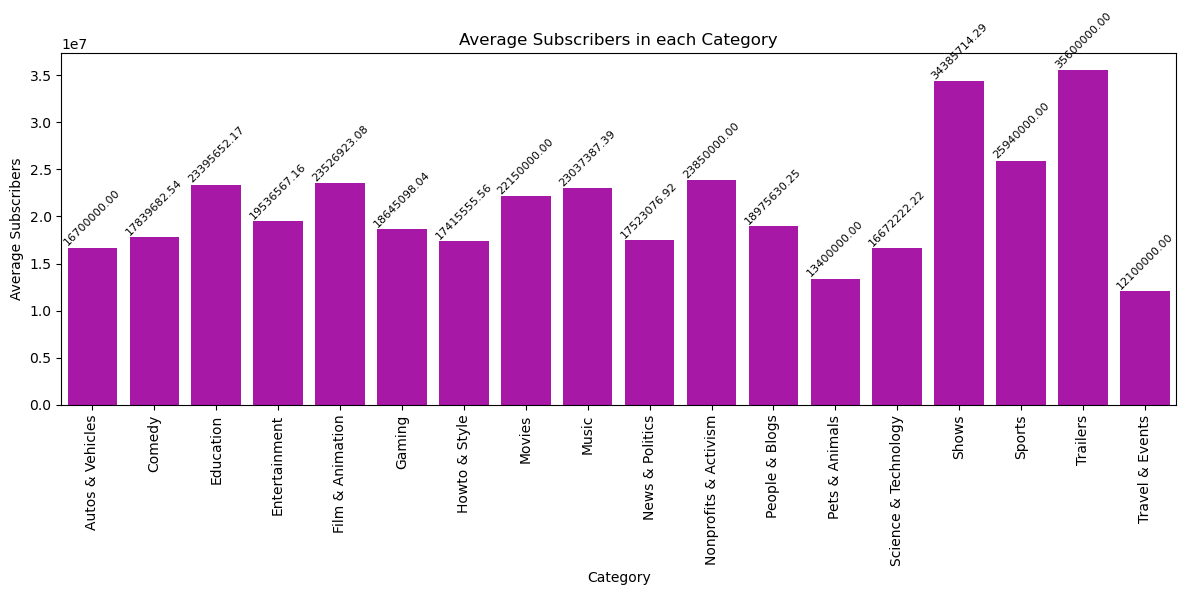

In [407]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=cat_mean, x='category', y='subscribers', color = 'm')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=8, rotation = 45)
plt.xlabel('Category')
plt.ylabel('Average Subscribers')
plt.title('Average Subscribers in each Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

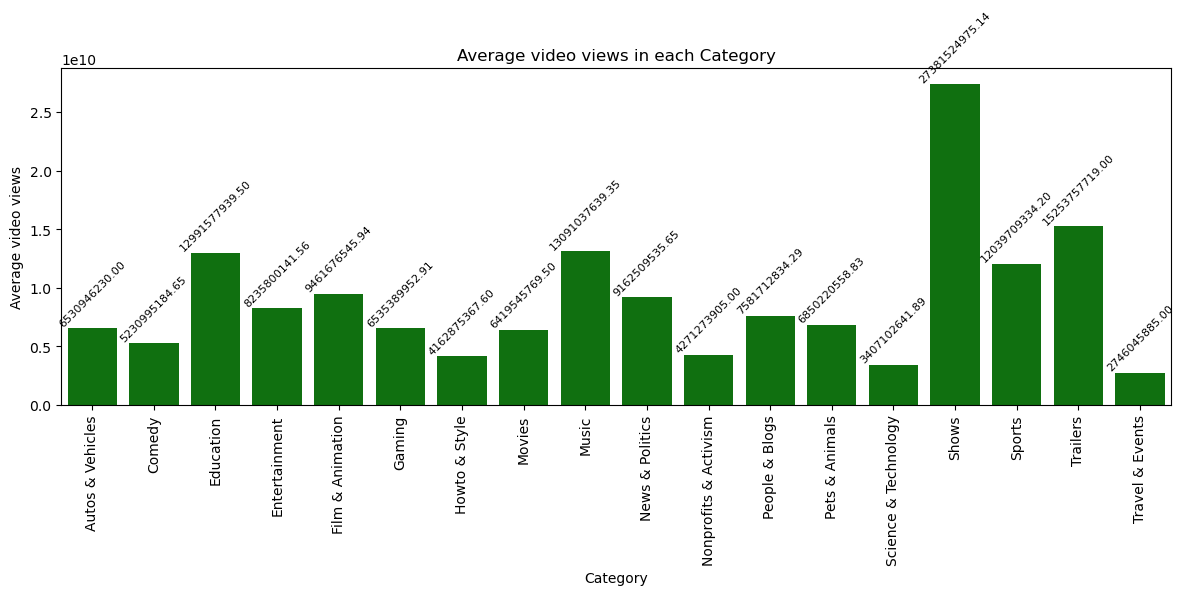

In [408]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=cat_mean, x='category', y='video views', color = 'g')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=8, rotation = 45)
plt.xlabel('Category')
plt.ylabel('Average video views')
plt.title('Average video views in each Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

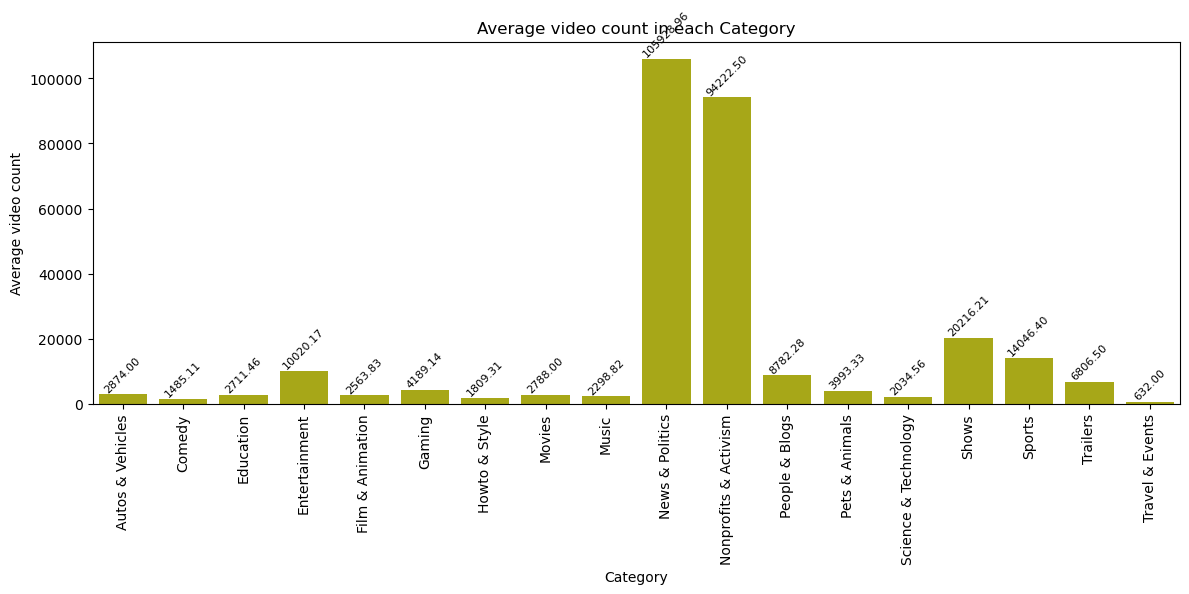

In [409]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=cat_mean, x='category', y='video count', color = 'y')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=8, rotation = 45)
plt.xlabel('Category')
plt.ylabel('Average video count')
plt.title('Average video count in each Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## **Outlier detection**

In [410]:
def remove_outliers(variable):
    
    # Calculate 1st, 3rd quartiles and iqr.
    q1, q3 = variable.quantile(0.25), variable.quantile(0.75)
    iqr = q3 - q1
    
    # Calculate lower fence and upper fence for outliers
    lowerFence, upperFence = q1-1.5*iqr, q3+1.5*iqr   # Any values less than l_fence and greater than u_fence are outliers.
    
    # Observations that are outliers
    outliers = variable[(variable<lowerFence) | (variable>upperFence)]
    
    # Drop obsevations that are outliers
    filtered = variable.drop(outliers.index, axis = 0).reset_index(drop=True)
    return filtered

def plotBoxPlot(variable,filteredVariable):
    
    # Create subplot object.
    fig = make_subplots(
        rows=2,
        cols=1,
        print_grid=False,
    subplot_titles=(f"{variable.name} Distribution with Outliers", f"{variable.name} Distribution without Outliers"))
    
    # This trace plots boxplot with outliers
    fig.add_trace(
        go.Box(
            x = variable,
            name = "", # This removes trace 0
            marker = dict(color="darkred")
        ),
    row=1,col=1)
    
    # This trace plots boxplot without outliers
    fig.add_trace(
        go.Box(
            x = filteredVariable,
            name = "",
            marker = dict(color="green")
        ),
    row=2,col=1)
    
    # Update layout
    fig.layout.update(
        height=800, 
        width=870,
        showlegend=False,
        paper_bgcolor="rgb(243, 243, 243)",
        plot_bgcolor="rgb(243, 243, 243)"
        )
    
    # Update axes
    fig.layout.xaxis2.update(title=f"<b>{variable.name}</b>")
    return fig.show()



/opt/conda/lib/python3.10/site-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



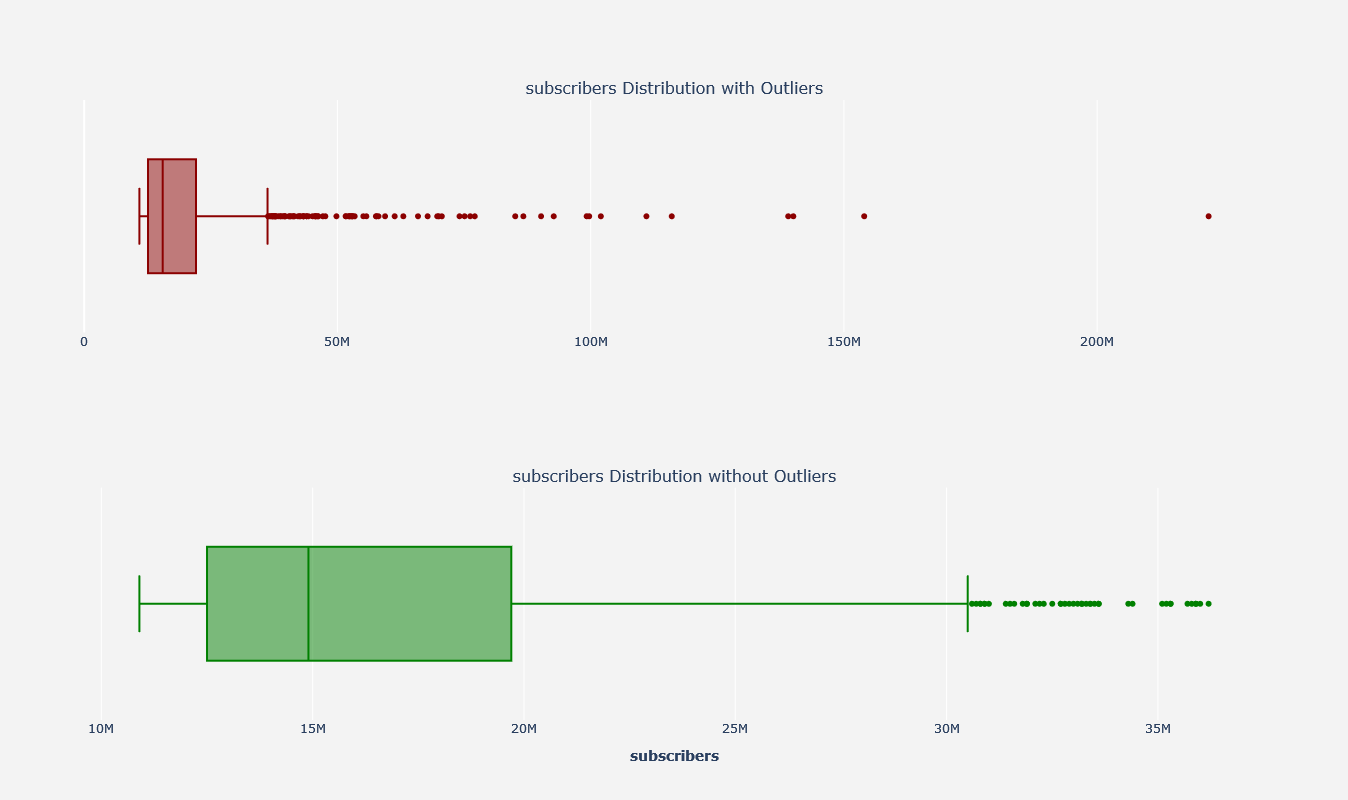

In [411]:
out_data = data.copy()
plotBoxPlot(out_data.subscribers,remove_outliers(out_data.subscribers))

/opt/conda/lib/python3.10/site-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



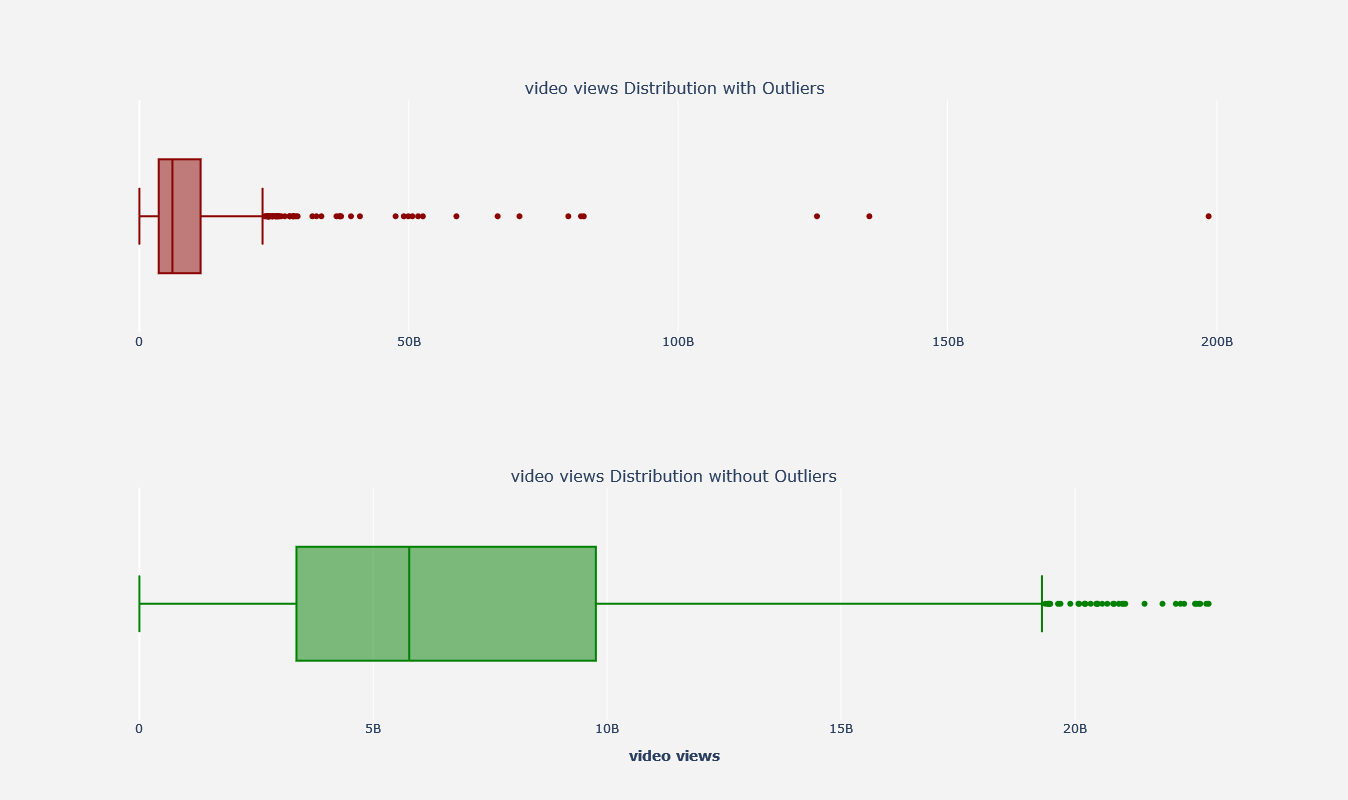

In [412]:
plotBoxPlot(out_data['video views'],remove_outliers(out_data['video views']))

/opt/conda/lib/python3.10/site-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



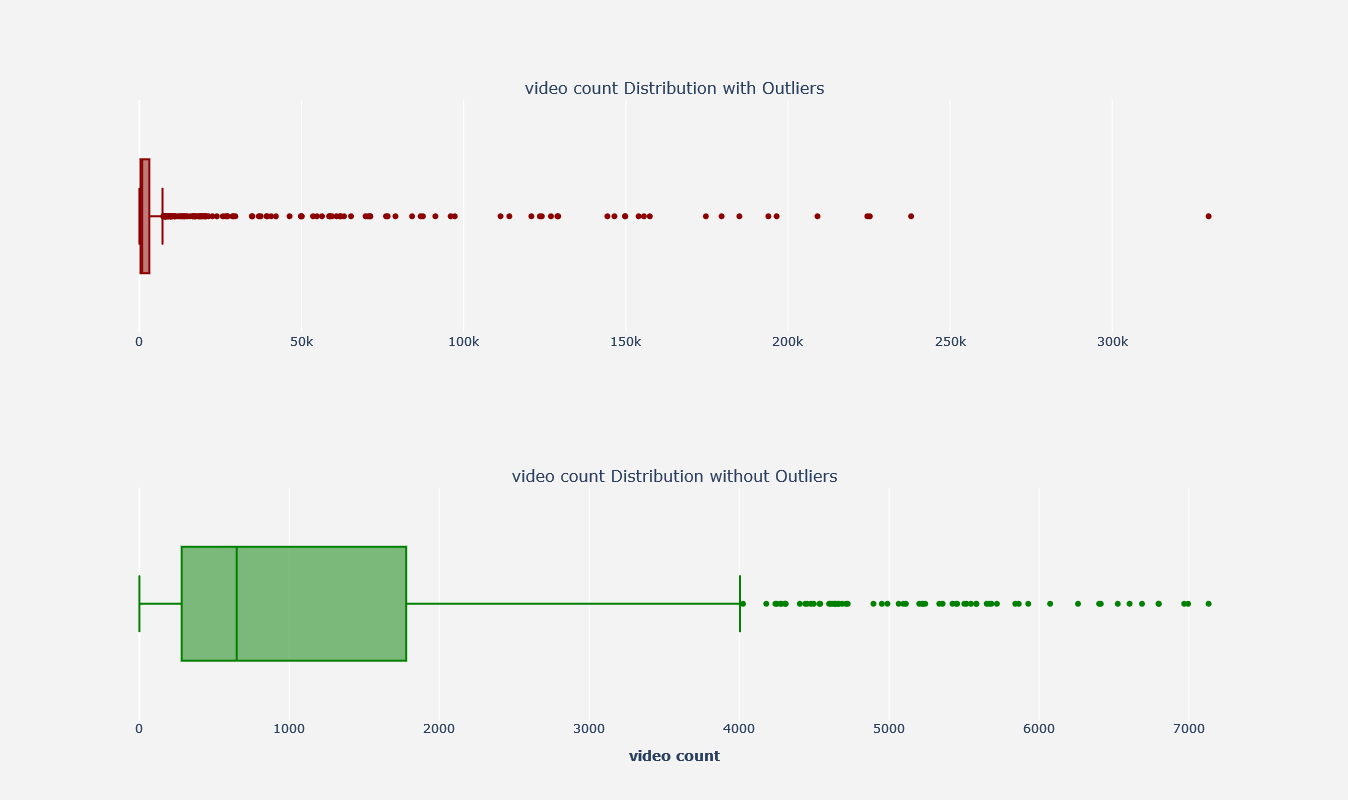

In [413]:
plotBoxPlot(out_data['video count'],remove_outliers(out_data['video count']))

# **Classification model**

In [414]:
le = LabelEncoder()
labels = le.fit_transform(data['category'])
data1 = data.copy()
data1['category'] = labels
data1.head()

,Youtuber,subscribers,video views,video count,category,started
rank,,,,,,
433,DUDU e CAROL,16700000,6530946230,2874,0,2013
320,Noor Stars,19500000,2545886796,627,1,2014
515,Bizarrap,15200000,4683488651,78,1,2017
87,Jkk Entertainment,35700000,15133442317,194,1,2017
882,Rubius Z,11700000,1828200652,429,1,2006


In [415]:
data1.corr()

,subscribers,video views,video count,category,started
subscribers,1.000000,0.747651,0.061776,0.045358,-0.127155
video views,0.747651,1.000000,0.148404,0.090498,-0.181126
video count,0.061776,0.148404,1.000000,0.092658,-0.146371
category,0.045358,0.090498,0.092658,1.000000,-0.059090
started,-0.127155,-0.181126,-0.146371,-0.059090,1.000000


## Feature selection


In [416]:
from sklearn.feature_selection import f_classif

In [417]:
data1.drop('Youtuber', axis = 1, inplace=True)
data1.drop('started', axis = 1, inplace=True)

In [418]:
fdataX = data1.drop('category', axis=1)  
fdatay = data1['category']

# Perform ANOVA test
f_stat, p_values = f_classif(fdataX, fdatay)

# Create a DataFrame to store the feature scores
f_scores = pd.DataFrame({'Feature': fdataX.columns, 'F-Score': f_stat, 'p-value': p_values})

# Sort the features by their F-Scores in descending order
f_scores = f_scores.sort_values('F-Score', ascending=False)

# Print the f-scores and feature scores
print("ANOVA F-Scores:")
print(f_scores)

ANOVA F-Scores:
       Feature    F-Score       p-value
2  video count  28.445737  1.249257e-73
1  video views   5.649559  2.304286e-12
0  subscribers   2.018228  8.445666e-03


In [419]:
data1.corr()

,subscribers,video views,video count,category
subscribers,1.000000,0.747651,0.061776,0.045358
video views,0.747651,1.000000,0.148404,0.090498
video count,0.061776,0.148404,1.000000,0.092658
category,0.045358,0.090498,0.092658,1.000000


In [420]:
data1.head()

,subscribers,video views,video count,category
rank,,,,
433,16700000,6530946230,2874,0
320,19500000,2545886796,627,1
515,15200000,4683488651,78,1
87,35700000,15133442317,194,1
882,11700000,1828200652,429,1


### Split the data

In [429]:
X = data1.iloc[:,:3]
y = data1['category']


In [430]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [423]:
'''A function that evaluates all the classifiers and returns the training accuracies in a dataframe'''
def evaluate_models(X, y):

    # List of classifiers
    classifiers = [
        LogisticRegression(),
        SVC(gamma="auto"),
        RandomForestClassifier(random_state=42, n_estimators=100),
        KNeighborsClassifier(),
        GaussianNB(),
        DecisionTreeClassifier(random_state=42),
        GradientBoostingClassifier(random_state=42),
        AdaBoostClassifier(random_state=42),
        ExtraTreesClassifier(random_state=42),
        XGBClassifier(random_state=42)
    ]

    # Evaluate the classifiers and calculate accuracies and cv scores
    accuracies = []
    cv_scores = []
    precisions = []
    f1_scores = []
    for classifier in classifiers:
        classifier.fit(X_train, y_train)
        train_pred = classifier.predict(X_train)
        accuracy = accuracy_score(y_train, train_pred)
        cv_score = cross_val_score(classifier, X_train, y_train, cv=5).mean()
        cv_score = round(cv_score * 100,2)
        precision = precision_score(y_train, train_pred, average='weighted')
        f1 = f1_score(y_train, train_pred, average='weighted')
        accuracies.append(accuracy)
        cv_scores.append(cv_score)
        precisions.append(precision)
        f1_scores.append(f1)

    # Create a DataFrame to store
    clf = [
        'Logistic Regression',
        'SVC',
        'RandomForestClassifier',
        'KNeighborsClassifier',
        'GaussianNB',
        'DecisionTreeClassifier',
        'GradientBoostingClassifier',
        'AdaBoostClassifier',
        'ExtraTreesClassifier',
        'XGBClassifier']
    results = pd.DataFrame({'Model': clf, 'Accuracy': accuracies, 'Precision': precisions, 'f1_score':f1_scores,'CV_score':cv_scores})

    return results

In [431]:
evaluate_models(X,y)

,Model,Accuracy,Precision,f1_score,CV_score
0,Logistic Regression,0.250313,0.120667,0.133477,27.66
1,SVC,1.000000,1.000000,1.000000,26.78
2,RandomForestClassifier,1.000000,1.000000,1.000000,35.55
3,KNeighborsClassifier,0.460576,0.451063,0.437456,24.53
4,GaussianNB,0.244055,0.196906,0.199992,21.40
5,DecisionTreeClassifier,1.000000,1.000000,1.000000,28.41
6,GradientBoostingClassifier,0.934919,0.937254,0.934899,33.79
7,AdaBoostClassifier,0.325407,0.306015,0.266294,32.55
8,ExtraTreesClassifier,1.000000,1.000000,1.000000,33.29
9,XGBClassifier,0.997497,0.996268,0.996870,NaN


In [425]:
def tune_models(X, y):
    
    # Define a dictionary of parameter grids for each model
    param_grids = {
        LogisticRegression(): {'C': [0.1, 1, 10]},
        SVC(gamma="auto"): {'C': [0.1, 1, 10]},
        RandomForestClassifier(random_state=42, n_estimators=100): {'n_estimators': [100, 200, 300]},
        KNeighborsClassifier(): {'n_neighbors': [3, 5, 7]},
        GaussianNB(): {},
        DecisionTreeClassifier(random_state=42): {'max_depth': [None, 3, 5]},
        GradientBoostingClassifier(random_state=42): {'n_estimators': [100, 200, 300]},
        AdaBoostClassifier(random_state=42): {'n_estimators': [50, 100, 200]},
        ExtraTreesClassifier(random_state=42): {'n_estimators': [100, 200, 300]},
        XGBClassifier(random_state=42): {'max_depth': [3, 5, 7]}
    }

    # Tune the hyperparameters and calculate accuracies
    accuracies = []
    precisions = []
    f1_scores = []
    for classifier in param_grids.keys():
        param_grid = param_grids[classifier]
        grid_search = GridSearchCV(classifier, param_grid, cv=5)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        train_pred = best_model.predict(X_train)
        accuracy = accuracy_score(y_train, train_pred)
        accuracies.append(accuracy)
        precision = precision_score(y_train, train_pred, average='weighted')
        f1 = f1_score(y_train, train_pred, average='weighted')
        precisions.append(precision)
        f1_scores.append(f1)


    # Create a DataFrame to store
    clf = [
        'Logistic Regression',
        'SVC',
        'RandomForestClassifier',
        'KNeighborsClassifier',
        'GaussianNB',
        'DecisionTreeClassifier',
        'GradientBoostingClassifier',
        'AdaBoostClassifier',
        'ExtraTreesClassifier',
        'XGBClassifier']
    results = pd.DataFrame({'Model': clf, 'Accuracy (Tuned)': accuracies, 'Precision(Tuned)':precisions, 'f1_score(Tuned)': f1_scores})

    return results



In [432]:
tune_models(X,y)

,Model,Accuracy (Tuned),Precision(Tuned),f1_score(Tuned)
0,Logistic Regression,0.250313,0.120667,0.133477
1,SVC,0.267835,0.071735,0.113162
2,RandomForestClassifier,1.000000,1.000000,1.000000
3,KNeighborsClassifier,0.424280,0.412267,0.391034
4,GaussianNB,0.244055,0.196906,0.199992
5,DecisionTreeClassifier,0.377972,0.211323,0.270518
6,GradientBoostingClassifier,1.000000,1.000000,1.000000
7,AdaBoostClassifier,0.325407,0.306015,0.266294
8,ExtraTreesClassifier,1.000000,1.000000,1.000000
9,XGBClassifier,0.932416,0.932665,0.931331


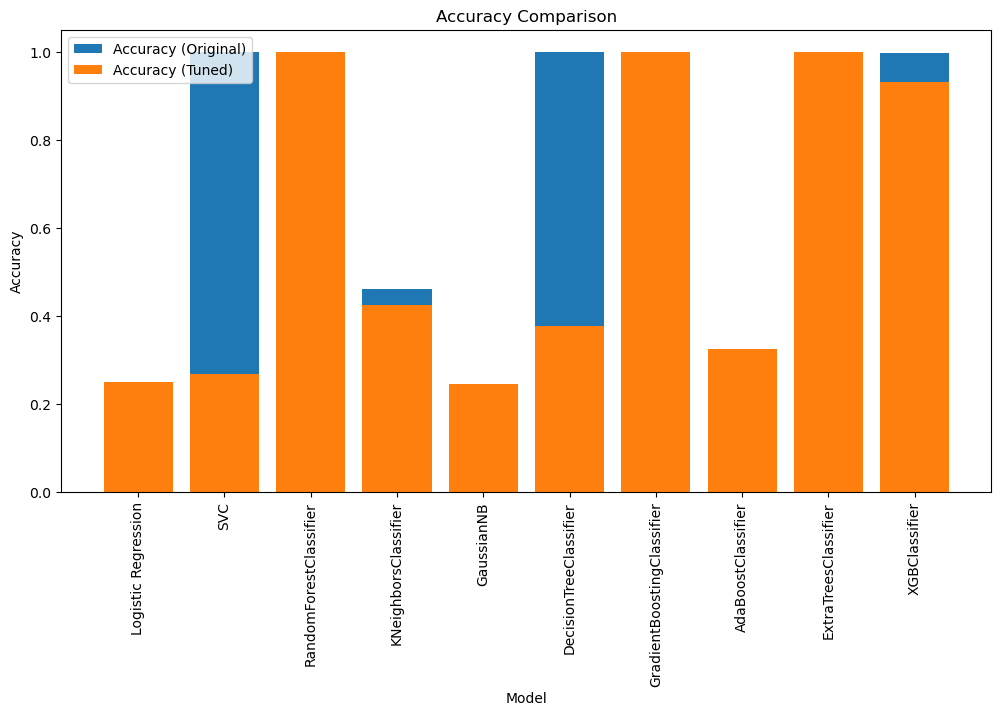

In [433]:
results = evaluate_models(X, y)

# Call the tune_models function and get the results
tuned_results = tune_models(X, y)

# Merge the results and tuned_results DataFrames based on the 'Model' column
merged_results = pd.merge(results, tuned_results, on='Model')

# Plot the accuracies
plt.figure(figsize=(12, 6))
plt.bar(merged_results['Model'], merged_results['Accuracy'], label='Accuracy (Original)')
plt.bar(merged_results['Model'], merged_results['Accuracy (Tuned)'], label='Accuracy (Tuned)')
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.legend()
plt.show()

In [434]:
top_models = tuned_results.nlargest(5, 'Accuracy (Tuned)')['Model']

trained_models = []
for model_name in top_models:
    if model_name == 'RandomForestClassifier':
        model = RandomForestClassifier(random_state=42, n_estimators=100)
    elif model_name == 'ExtraTreesClassifier':
        model = ExtraTreesClassifier(random_state=42, n_estimators=100)
    else:
        model = eval(model_name)()  # Create an instance of the model using parentheses
    model.fit(X_train, y_train)
    trained_models.append(model)

tr_predictions = []
ts_predictions = []
tr_accuracies = []
ts_accuracies = []
tr_precisions = []
ts_precisions = []
tr_f1 = []
ts_f1 = []
for model in trained_models:
    train_pred = model.predict(X_train)
    tr_predictions.append(train_pred)
    test_pred = model.predict(X_test)
    ts_predictions.append(test_pred)

    tr_accuracy = accuracy_score(y_train, train_pred)
    tr_accuracies.append(tr_accuracy)
    ts_accuracy = accuracy_score(y_test, test_pred)
    ts_accuracies.append(ts_accuracy)

    tr_precision = precision_score(y_train, train_pred, average='weighted')
    tr_precisions.append(tr_precision)
    ts_precision = precision_score(y_test, test_pred, average='weighted')
    ts_precisions.append(ts_precision)

    tr_f1sc = f1_score(y_train, train_pred, average='weighted')
    tr_f1.append(tr_f1sc)
    ts_f1sc = f1_score(y_test, test_pred, average='weighted')
    ts_f1.append(ts_f1sc)

results = pd.DataFrame({'train_acc': tr_accuracies, 'test_acc': ts_accuracies, 'train_prec': tr_precisions,
                        'test_prec': ts_precisions, 'train_f1': tr_f1, 'test_f1': ts_f1})

print(results)


   train_acc  test_acc  train_prec  test_prec  train_f1   test_f1
0   1.000000     0.345    1.000000   0.331974  1.000000  0.327970
1   0.934919     0.335    0.937254   0.331283  0.934899  0.323369
2   1.000000     0.375    1.000000   0.331341  1.000000  0.344212
3   0.997497     0.320    0.996268   0.322841  0.996870  0.304643
4   0.460576     0.210    0.451063   0.191930  0.437456  0.193260


# **Linear Regression model**

In [438]:
data.head()

,Youtuber,subscribers,video views,video count,category,started
rank,,,,,,
433,DUDU e CAROL,16700000,6530946230,2874,Autos & Vehicles,2013
320,Noor Stars,19500000,2545886796,627,Comedy,2014
515,Bizarrap,15200000,4683488651,78,Comedy,2017
87,Jkk Entertainment,35700000,15133442317,194,Comedy,2017
882,Rubius Z,11700000,1828200652,429,Comedy,2006


In [440]:
from sklearn.linear_model import LinearRegression

In [442]:
X = data.iloc[:,2:3]
y = data['subscribers']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

model = LinearRegression()

## Training the model
model.fit(X_train,y_train)

tr_pred = model.predict(X_train)

## Predicting test values
ts_pred = model.predict(X_test)

### import the metrics from sklearn
from sklearn.metrics import mean_squared_error, r2_score

### Mean squared error of training data
tr_mse = mean_squared_error(y_train,tr_pred)


### r2 score of training data
tr_r2 = r2_score(y_train,tr_pred)
tr_r2

### Mean squared error of testing data
ts_mse = mean_squared_error(y_test,ts_pred)
ts_mse

### r2 score of testing data
ts_r2 = r2_score(y_test,ts_pred)
tr_mse,tr_r2,ts_mse,ts_r2

(124116530784133.56, 0.41599782198906976, 53310279047269.7, 0.8647590271378023)